# Face Recognition (GOOGLE COLAB)

In [1]:
!nvidia-smi

Sun Jun  7 12:14:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%tensorflow_version 2.x

In [0]:
!pip install -q keras==2.3.0

In [4]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.0


In [0]:
from keras.preprocessing import image as kimage
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# (Mount Google Drive from the menu on the left)

# Define Train/test/val sets

In [0]:
my_pictures_dir ="/content/drive/My Drive/2D/pictures_masked_split"

In [0]:
train_dir = my_pictures_dir+"/train"
val_dir = my_pictures_dir+"/val"
test_dir = my_pictures_dir+"/test"

In [9]:
!ls "$my_pictures_dir/test"

alessandro  alinda  cami  gian	khaled	luca  mamma  papi


In [0]:
classes = ["alinda", "cami", "gian", "khaled", "mamma", "papi"]

In [0]:
color_mode = "grayscale"

## Sample from test set

The following is kept commented in case of future testing with featurewise center/std

In [0]:
# sample_processing = kimage.ImageDataGenerator()
# sample_generator = sample_processing.flow_from_directory(train_dir, classes = classes,
#                                                          rescale= 1./255,
#                                                     target_size=(224, 224),
#                                                     color_mode=color_mode,
#                                                     batch_size=64,
#                                                     class_mode="categorical",
#                                                     shuffle=True,
#                                                     seed=1)

In [0]:
# sample = sample_generator.next()
# sample_features = sample[0]
# sample_labels = sample[1]

In [0]:
# plt.imshow(sample_features[0])

## Generators

In [0]:
train_processing = kimage.ImageDataGenerator(
    # featurewise_center=True, # UNCOMMENT for testing with previous code
    # featurewise_std_normalization=True, # UNCOMMENT for testing with previous
    rescale= 1./255, # COMMENT for testing with previous
    # Rotations
    # rotation_range=10,
    # # Shifts
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # # Flips
    horizontal_flip=True,
    # vertical_flip=True,
    # Brightness Change
    brightness_range=[0.6,1.4],
    # Zoom Change
    zoom_range=[0.9,1.1] # TODO: test without this
)

In [0]:
# train_processing.fit(sample_features # UNCOMMENT for testing with previous code

In [0]:
# train_processing.mean

In [18]:
train_generator = train_processing.flow_from_directory(train_dir,
                                                       classes = classes,
                                                       target_size=(224, 224),
                                                       color_mode=color_mode,
                                                       batch_size=32,
                                                       class_mode="categorical",
                                                       shuffle=True,
                                                       seed=1)

Found 990 images belonging to 6 classes.


In [19]:
labels_to_text = [i[0] for i in train_generator.class_indices.items()]
labels_to_text

['alinda', 'cami', 'gian', 'khaled', 'mamma', 'papi']

In [20]:
test_processing = kimage.ImageDataGenerator(# featurewise_center=True,
                                            # featurewise_std_normalization=True
                                            rescale = 1./255,
                                            )
# test_processing.fit(sample_features) # UNCOMMENT for testing with previous code

val_generator = test_processing.flow_from_directory(val_dir,
                                                    classes = classes,
                                                    target_size=(224, 224),
                                                    color_mode=color_mode,
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=False,
                                                    seed=1)

test_generator = test_processing.flow_from_directory(test_dir,
                                                     classes = classes,
                                                     target_size=(224, 224),
                                                     color_mode=color_mode,
                                                     batch_size=32,
                                                     class_mode="categorical",
                                                     shuffle=False,
                                                     seed=1)

Found 282 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [21]:
n_classes = (train_generator.num_classes)
n_classes

6

### See images

In [0]:
batch = np.array(train_generator.next()[0])

In [23]:
batch.shape

(32, 224, 224, 1)

In [0]:
# mu = train_processing.mean # UNCOMMENT for testing with previous code
# sigma = train_processing.std # UNCOMMENT for testing with previous code

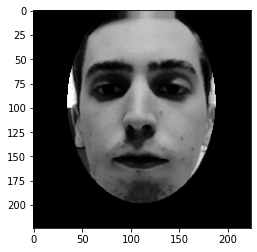

In [25]:
pic = batch[6]
# plt.imshow((pic*sigma + mu)/255)
plt.imshow(pic[:,:,0], cmap="gray")
plt.show()

In [26]:
input_shape = pic.shape
input_shape

(224, 224, 1)

# Net

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))

In [0]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [0]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         restore_best_weights=True, patience=5)

In [30]:
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
30/30 [==============================] - 329s 11s/step - loss: 3.9476 - accuracy: 0.4415 - val_loss: 0.5866 - val_accuracy: 0.8794
Epoch 2/50
30/30 [==============================] - 21s 706ms/step - loss: 0.9777 - accuracy: 0.7724 - val_loss: 0.1389 - val_accuracy: 0.9291
Epoch 3/50
30/30 [==============================] - 7s 242ms/step - loss: 0.2537 - accuracy: 0.9175 - val_loss: 0.0115 - val_accuracy: 0.9645
Epoch 4/50
30/30 [==============================] - 7s 241ms/step - loss: 0.3046 - accuracy: 0.9342 - val_loss: 0.0900 - val_accuracy: 0.9574
Epoch 5/50
30/30 [==============================] - 7s 243ms/step - loss: 0.0920 - accuracy: 0.9729 - val_loss: 0.0222 - val_accuracy: 0.9574
Epoch 6/50
30/30 [==============================] - 7s 244ms/step - loss: 1.0193 - accuracy: 0.8967 - val_loss: 0.0050 - val_accuracy: 0.9894
Epoch 7/50
30/30 [==============================] - 7s 247ms/step - loss: 0.0644 - accuracy: 0.9771 - val_loss: 0.0026 - val_accuracy: 0.9929
Epoch

# Save Model

In [0]:
import os

In [0]:
latest_model_number = max([int(e.split("_")[0]) for e in os.listdir("/content/drive/My Drive/2D/models/")])

In [0]:
model_name = latest_model_number + 1

In [34]:
model_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.h5"
json_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.json"
model_filename, json_filename

('/content/drive/My Drive/2D/models/17_model.h5',
 '/content/drive/My Drive/2D/models/17_model.json')

In [0]:
# mu = list(train_processing.mean[0][0])
# std = list(train_processing.std[0][0])

In [36]:
d = {}
# d["mean"] = [str(i) for i in mu]
# d["std"] = [str(i) for i in std]
d["mask"] = True
d["model_n"] = model_name
d["featurewise_center"] = False
d["featurewise_std"] = False
d["class_indices"] = [i[0] for i in train_generator.class_indices.items()]

d

{'class_indices': ['alinda', 'cami', 'gian', 'khaled', 'mamma', 'papi'],
 'featurewise_center': False,
 'featurewise_std': False,
 'mask': True,
 'model_n': 17}

In [0]:
import json

In [0]:
with open(json_filename, "w") as jsonf:
    json.dump(d, jsonf)

In [0]:
net.save(model_filename)

## Evaluation


In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

In [41]:
net.evaluate_generator(train_generator)

[0.008598155342042446, 0.9989898800849915]

In [42]:
net.evaluate_generator(val_generator)

[5.456095095723867e-07, 1.0]

In [43]:
net.evaluate_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


[0.00012834634981118143, 0.9791666865348816]

In [0]:
def classification_report_generator(generator):
  # should not be applied to generators with shuffle = True
  preds = net.predict_generator(generator)
  preds = np.argmax(preds, axis=1)
  real = generator.classes
  ind_dict = generator.class_indices
  num_to_label = [i[0] for i in ind_dict.items()]
  cmat = cm(real, preds)
  cr = classification_report(real, preds, target_names=num_to_label)
  return cmat, cr

In [45]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

      alinda       1.00      1.00      1.00        47
        cami       1.00      1.00      1.00        47
        gian       1.00      1.00      1.00        47
      khaled       1.00      1.00      1.00        47
       mamma       1.00      1.00      1.00        47
        papi       1.00      1.00      1.00        47

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282



In [46]:
cm_test, cr_test = classification_report_generator(test_generator)
print(cr_test)

              precision    recall  f1-score   support

      alinda       0.92      0.96      0.94        24
        cami       1.00      1.00      1.00        24
        gian       0.96      1.00      0.98        24
      khaled       1.00      1.00      1.00        24
       mamma       1.00      1.00      1.00        24
        papi       1.00      0.92      0.96        24

    accuracy                           0.98       144
   macro avg       0.98      0.98      0.98       144
weighted avg       0.98      0.98      0.98       144



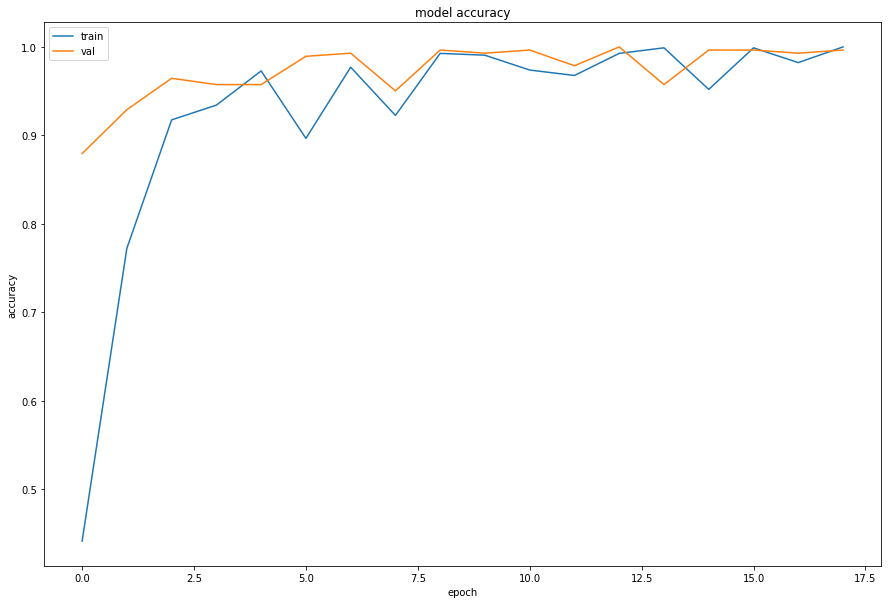

In [47]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

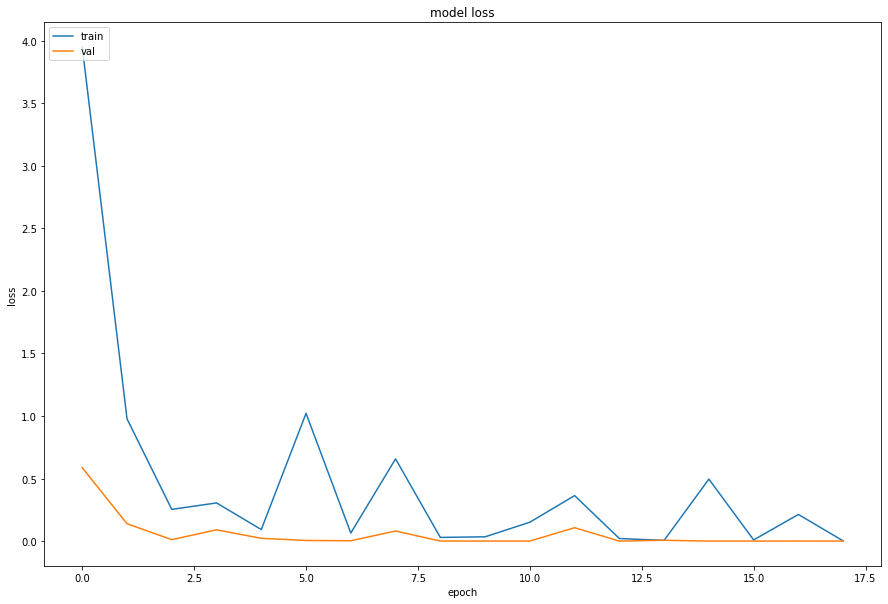

In [48]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# TODO

- Try different architectures
- Collect more data?
- look at these? 
  - https://github.com/Golbstein/keras-face-recognition
  - https://github.com/krasserm/face-recognition